# Publishing Tech Trends

![Trying stuff...](vis/00-Cover.jpg)

In this notebook we will explore data related to the publishing tech sector. Books' metadata have been retrieved from the O'Reilly Learning Platform, where
the following publishers make part of their catalogue available to O'Reilly subscribers:

* Addison-Wesley Professional
* Apress
* Manning
* Microsoft Press
* No Starch Press
* O'Reilly Media, Inc.
* Packt Publishing
* Pearson
* Pragmatic Bookshelf



## Initial steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_json('data/dataset.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5522 entries, 0 to 5521
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        5522 non-null   int64  
 1   title             5522 non-null   object 
 2   authors           5522 non-null   object 
 3   description       5522 non-null   object 
 4   language          5522 non-null   object 
 5   categories        5522 non-null   object 
 6   url               5522 non-null   object 
 7   cover_image       5522 non-null   object 
 8   publication_date  5522 non-null   object 
 9   publishers        5522 non-null   object 
 10  page_count        5522 non-null   int64  
 11  average_rating    3034 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 517.8+ KB


The dataset consists of 5522 entries, the column `product_id` is a unique identifier for the row, it corresponds to the **ISBN** code.
Each row has values for every column except for *average_rating*, unfortunately not all books have ratings.

In [4]:
product_id_is_unique = df['product_id'].is_unique
print(f"Product id is unique: {product_id_is_unique}")
df.set_index('product_id', inplace=True)

Product id is unique: True


## Cleanup

Title, description and language columns treatment, remove whitespace characters (leading and/or trailing).

In [5]:
df[['title', 'description', 'language']] = df[['title', 'description', 'language']].apply(lambda x: x.str.strip())

In [6]:
df['authors'] = df['authors'].apply(lambda x: [elem.strip() for elem in x])

Let's look at language columns

In [7]:
df['language'].value_counts()

language
en         5501
zh-hans      11
en-us         9
pt            1
Name: count, dtype: int64

We can convert the book with language *en-us* to *en*, and we can remove the books in chinese and portuguese languages as they are not representatives in the dataset.

In [8]:
zh_or_pt_languages_filter = (df['language'] == 'zh-hans') | (df['language'] == 'pt')

In [9]:
df.loc[zh_or_pt_languages_filter]

,title,authors,description,language,categories,url,cover_image,publication_date,publishers,page_count,average_rating
product_id,,,,,,,,,,,
9787111549246,程序设计导论：Python语言实践,"[罗伯特 塞奇威克, 凯文 韦恩, 罗伯特 唐德罗]",本书从跨学科的角度入手，强调应用，介绍Python有用的功能，包括编程的基本要素、功能、模块...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],350,NaN
9787111633280,C++语言导学（原书第2版）,[本贾尼 斯特劳斯特鲁普],本书简洁、自成体系，包含C++ 语言大多数主要特性和标准库组件。当然，这些并未深入介绍，而是...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111562528,C++程序设计：原理与实践（进阶篇）（原书第2版）,[本贾尼 斯特劳斯特鲁普],C++之父Bjarne Stroustrup经典著作《C++程序设计：原理与实践（原书第2版...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111678458,Python程序设计：人工智能案例实践,"[保罗 戴特尔, 哈维 戴特尔]",本书共16章。第1~10章介绍Python编程，涉及人工智能、基本描述统计、集中趋势和分散度...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111544395,C++程序设计语言（第4部分：标准库）（原书第4版）,[本贾尼 斯特劳斯特鲁普],作为C++语言的发明者和主要维护者，Bjarne Stroustrup在撰写本书时绝不仅仅满...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111562252,C++程序设计：原理与实践（基础篇）（原书第2版）,[本贾尼 斯特劳斯特鲁普],C++之父Bjarne Stroustrup的经典著作《C++程序设计：原理与实践（原书第2...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111640899,数据科学之编程技术：使用R进行数据清理、分析与可视化,"[迈克尔 弗里曼, 乔尔 罗斯]",本书围绕使用R进行数据科学编程所需的实际步骤展开。全书着眼于该主题，介绍了有关该主题的工具和...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111370048,Java并发编程实战,"[Brian Goetz, Tim Peierls]",本书深入浅出地介绍了Java线程和并发，是一本完美的Java并发参考手册。书中从并发性和线程...,zh-hans,"[[Software Development, Programming Languages,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN
9787111684527,面向对象的思考过程（原书第5版）,[马特 魏斯费尔德],本书是一部独具特色的面向对象技术著作。书中结合代码示例生动透彻地讲述了面向对象思想的精髓，让...,zh-hans,"[[Software Development, Software Architecture,...",https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2021-08-16,[Pearson],450,NaN


In [10]:
df.drop(index=df[zh_or_pt_languages_filter].index, inplace=True)

In [11]:
print(f'Book count: {len(df.index.drop_duplicates())}')

Book count: 5510


Updating language from en-us to en

In [12]:
en_us_filter = df['language'] == 'en-us'

In [13]:
df.loc[en_us_filter, ['language']] = 'en'

In [14]:
df.loc[df['language'] == 'en-us']

,title,authors,description,language,categories,url,cover_image,publication_date,publishers,page_count,average_rating
product_id,,,,,,,,,,,


In [15]:
df.loc[zh_or_pt_languages_filter]

,title,authors,description,language,categories,url,cover_image,publication_date,publishers,page_count,average_rating
product_id,,,,,,,,,,,


Let's look at categories, each book has a list of categories, which is wrapped into another list. The first step is to reduce the nesting and later on to *explode* the list of categories.
Each book will have one or more entries according to its amount of categories.

In [16]:
df['categories']

product_id
9781633438774                   [[Data, Enterprise Data Strategy]]
9781804610879    [[Software Development, Programming Languages,...
9781803230085    [[Software Development, Software Architecture,...
9780138254919    [[IT Operations, Computer Networking, Network ...
9781835080399    [[IT Operations, IT Certifications, Cisco Cert...
                                       ...                        
9781491922996    [[IT Operations, DevOps, Configuration Managem...
9780134122885    [[Software Development, Programming Languages,...
9781449342562    [[IT Operations, Cloud Computing, Cloud Platfo...
9781449335007                  [[Design, Design Process, Lean UX]]
9780596529963    [[Business, Sales & Marketing, Marketing, Soci...
Name: categories, Length: 5510, dtype: object

In [17]:
df['categories'] = df['categories'].apply(lambda x: x[0])

In [18]:
df['categories'].head(10)

product_id
9781633438774                     [Data, Enterprise Data Strategy]
9781804610879    [Software Development, Programming Languages, ...
9781803230085    [Software Development, Software Architecture, ...
9780138254919    [IT Operations, Computer Networking, Network A...
9781835080399    [IT Operations, IT Certifications, Cisco Certi...
9781098110581       [Design, Product Design, User Experience (UX)]
9781804615690    [Business, Business Strategy, Business Archite...
9781801812542    [Software Development, Programming Languages, ...
9781800569386    [Math, Science, Engineering, Engineering, Mech...
9781801812399    [IT Operations, Cloud Computing, Cloud Platfor...
Name: categories, dtype: object

In [19]:
df['categories'] = df['categories'].apply(lambda x: [elem.strip() for elem in x])

In [20]:
df = df.explode('categories')

Rename categories column:

In [21]:
df.rename(columns={'categories': 'category'}, inplace=True)

In [22]:
df[['title', 'publishers', 'category', 'page_count']].sort_values(by='page_count')

,title,publishers,category,page_count
product_id,,,,
9781492031949,Navigating the Continuous Delivery Pipeline,"[O'Reilly Media, Inc.]",IT Operations,1
9781492031888,Product Design vs. Design Thinking,"[O'Reilly Media, Inc.]",Design Process,1
9781492033172,Python vs. Go,"[O'Reilly Media, Inc.]",Programming Languages,1
9781492033172,Python vs. Go,"[O'Reilly Media, Inc.]",Go,1
9781492037774,Creating an Agile enterprise,"[O'Reilly Media, Inc.]",Software Development,1
...,...,...,...,...
9781484278697,Pro C# 10 with .NET 6: Foundational Principles...,[Apress],Programming Languages,1680
9781484278697,Pro C# 10 with .NET 6: Foundational Principles...,[Apress],Software Development,1680
9780137993857,OCP Oracle Certified Professional Java SE 17 D...,[Pearson],Software Development,1851


Books with low page count in our dataset are usually OReilly Reports or Infographics like the ones showed below:

![Radar example](cover_images/9781098145729.jpeg) &nbsp;&nbsp; ![Cloud Adoption for Mission-Critical Workloads](cover_images/9781098146658.jpeg) &nbsp;&nbsp;  ![Navigating the Continuous Delivery Pipeline](cover_images/9781492031949.jpeg) &nbsp;&nbsp; ![How to Choose a Cloud Provider](cover_images/9781492032908.jpeg)

We need to filter them out, because we want to compare publishers on **real books** :-)

We will use the following strategies:

1. Radar is sometimes used as a book category
2. We can check data distribution for page count and remove *outliers* on the low page count side (way below Q1)
3. We can check the book cover image (looking for Report or Infographic strings)

We will also take advantage of the fact that O'Reilly is the only publisher of these reports.

## 1. Radar as a book category

In [23]:
report_category_filter = df['category'] == 'Radar'

In [24]:
df[report_category_filter]

,title,authors,description,language,category,url,cover_image,publication_date,publishers,page_count,average_rating
product_id,,,,,,,,,,,
9781098156527,Radar Trends to Watch: June 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-13,"[O'Reilly Media, Inc.]",10,5.0
9781098153915,Radar Trends to Watch: May 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-05-09,"[O'Reilly Media, Inc.]",10,5.0
9781098152895,Radar Trends to Watch: April 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-04-05,"[O'Reilly Media, Inc.]",10,NaN
9781098151430,Radar Trends to Watch: March 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-03-07,"[O'Reilly Media, Inc.]",10,NaN
9781098149277,Radar Trends to Watch: February 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-02-07,"[O'Reilly Media, Inc.]",10,NaN
9781098148010,Radar Trends to Watch: January 2023,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-01-06,"[O'Reilly Media, Inc.]",10,NaN
9781098146993,Radar Trends to Watch: December 2022,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2022-12-06,"[O'Reilly Media, Inc.]",10,5.0
9781098145729,Radar Trends to Watch: November 2022,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2022-11-08,"[O'Reilly Media, Inc.]",10,NaN
9781098144913,Radar Trends to Watch: October 2022,[Mike Loukides],Read about the latest developments on O'Reilly...,en,Radar,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2022-10-11,"[O'Reilly Media, Inc.]",10,NaN


In [25]:
radar_books_index = df[report_category_filter].index

In [26]:
df.drop(index=radar_books_index, inplace=True)

In [27]:
print(f'Book count: {len(df.index.drop_duplicates())}')

Book count: 5492


## 2. Remove outliers (Page count)

In [28]:
def describe_with_num_bins(series: pd.Series):
    """
    Calculate number of bins using Freedman Diaconis formula
    https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    fd_formula_bin_width = 2 * iqr / np.power(len(series), 1/3)
    num_bins = (series.max() - series.min()) / fd_formula_bin_width
    return q1, q3, iqr, round(num_bins)

In [29]:
page_count_series = df['page_count']

In [30]:
page_count_series

product_id
9781633438774    192
9781633438774    192
9781804610879    346
9781804610879    346
9781804610879    346
                ... 
9781449335007    233
9780596529963    265
9780596529963    265
9780596529963    265
9780596529963    265
Name: page_count, Length: 18546, dtype: int64

In [31]:
s = df['page_count']
q1, q3, iqr, num_bins = describe_with_num_bins(s)
print(q1, q3, iqr)

248.0 472.0 224.0


<Axes: xlabel='page_count', ylabel='Count'>

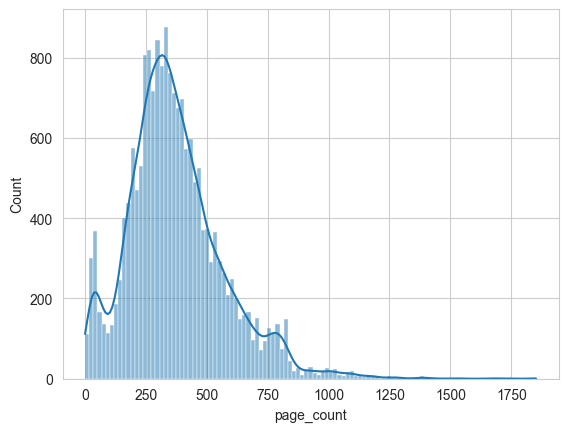

In [32]:
sns.histplot(data=df, x='page_count', bins=num_bins, kde=True)

The data distribution is skewed to the right, 50% of books have a page count between 248 and 472 (q1 and q3).
On average each book has 375 pages. We are not worried outliers greater than q3, we still consider them *valid* books (although close to a weapon).
We want to drop, outliers that are smaller than q1 that are similar to the *report* showed before, we will use the [IQR method](https://online.stat.psu.edu/stat200/lesson/3/3.2).
We will create a *fence*:
* fence = q1 - (1.5 * IQR)

then we will check all books with page count smaller than fence.

Let's check current skewness value:

In [33]:
s.skew()

0.9989517332187579

We need to reduce this right skewness before dropping some outliers, we will apply a square root transformation.

In [34]:
df['normalized_page_count'] = np.sqrt(s)

In [35]:
df['normalized_page_count'].skew()

-0.1976159899535718

In [36]:
q1, q3, iqr, num_bins = describe_with_num_bins(df['normalized_page_count'])

<Axes: xlabel='normalized_page_count', ylabel='Count'>

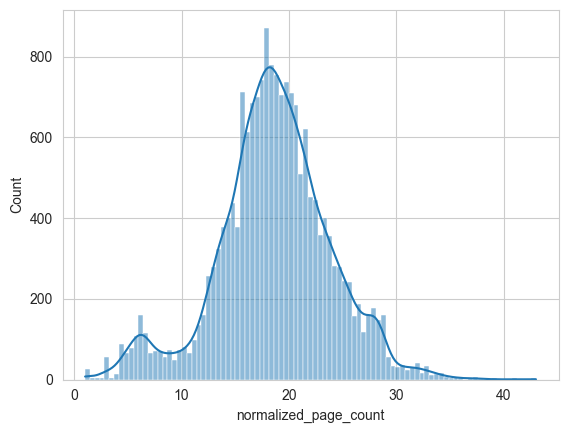

In [37]:
sns.histplot(data=df, x='normalized_page_count', bins=num_bins, kde=True)

In [38]:
fence = round(q1 - (1.5 * iqr))

We can drop from the dataset all the books with normalized_page_count less than 7.
We need to fix publishers column, publishers is a list, we verify that each book has only one publisher.

In [39]:
multiple_pub_per_book = df['publishers'].apply(len) > 1

In [40]:
df[multiple_pub_per_book]

,title,authors,description,language,category,url,cover_image,publication_date,publishers,page_count,average_rating,normalized_page_count
product_id,,,,,,,,,,,,


It's safe to transform from list of strings to string value for publishers

In [41]:
df['publishers'] = df['publishers'].apply(lambda x: x[0])

In [42]:
df.rename(columns={'publishers': 'publisher'}, inplace=True)

In [43]:
filter_norm_page_count = (df['normalized_page_count'] < 7) & (df['publisher'] == "O'Reilly Media, Inc.")

In [44]:
df[filter_norm_page_count]

,title,authors,description,language,category,url,cover_image,publication_date,publisher,page_count,average_rating,normalized_page_count
product_id,,,,,,,,,,,,
9781098146658,What Is Trunk-Based Development?,[Clare Sudbery],Software development often goes wrong. Very wr...,en,Software Development,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-25,"O'Reilly Media, Inc.",47,NaN,6.855655
9781098146306,What Is Crossplane?,[Nic Cope],Control planes provide an increasingly popular...,en,IT Operations,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-05-25,"O'Reilly Media, Inc.",30,NaN,5.477226
9781098146306,What Is Crossplane?,[Nic Cope],Control planes provide an increasingly popular...,en,Virtualization,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-05-25,"O'Reilly Media, Inc.",30,NaN,5.477226
9781098146306,What Is Crossplane?,[Nic Cope],Control planes provide an increasingly popular...,en,Containers,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-05-25,"O'Reilly Media, Inc.",30,NaN,5.477226
9781098146306,What Is Crossplane?,[Nic Cope],Control planes provide an increasingly popular...,en,Container Orchestrators,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-05-25,"O'Reilly Media, Inc.",30,NaN,5.477226
...,...,...,...,...,...,...,...,...,...,...,...,...
9781492028017,Understanding Patterns of Enterprise Transform...,"[Helen Williams, Jeremy Sutherland]","Although companies ""going digital"" has capture...",en,Business Strategy,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-01-15,"O'Reilly Media, Inc.",39,5.0,6.244998
9781492028017,Understanding Patterns of Enterprise Transform...,"[Helen Williams, Jeremy Sutherland]","Although companies ""going digital"" has capture...",en,Digital Transformation,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-01-15,"O'Reilly Media, Inc.",39,5.0,6.244998
9781492027980,The Making of an Agile Leader,[Jean Dahl],Going digital is essential for companies looki...,en,Software Development,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-01-15,"O'Reilly Media, Inc.",47,NaN,6.855655


In [45]:
entries_to_drop = df[filter_norm_page_count].index

In [46]:
df.drop(index=entries_to_drop, inplace=True)

In [47]:
df

,title,authors,description,language,category,url,cover_image,publication_date,publisher,page_count,average_rating,normalized_page_count
product_id,,,,,,,,,,,,
9781633438774,Data for All,[John Kt],Do you know what happens to your personal data...,en,Data,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-29,Manning Publications,192,NaN,13.856406
9781633438774,Data for All,[John Kt],Do you know what happens to your personal data...,en,Enterprise Data Strategy,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-29,Manning Publications,192,NaN,13.856406
9781804610879,Building Modern SaaS Applications with C# and ...,[Andy Watt],Embark on a tech-tastic adventure and build So...,en,Software Development,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-23,Packt Publishing,346,NaN,18.601075
9781804610879,Building Modern SaaS Applications with C# and ...,[Andy Watt],Embark on a tech-tastic adventure and build So...,en,Programming Languages,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-23,Packt Publishing,346,NaN,18.601075
9781804610879,Building Modern SaaS Applications with C# and ...,[Andy Watt],Embark on a tech-tastic adventure and build So...,en,.NET,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2023-06-23,Packt Publishing,346,NaN,18.601075
...,...,...,...,...,...,...,...,...,...,...,...,...
9781449335007,UX for Lean Startups,[Laura Klein],p>Great user experiences (UX) are essential fo...,en,Lean UX,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-11-16,"O'Reilly Media, Inc.",233,4.8,15.264338
9780596529963,Web 2.0: A Strategy Guide,[Amy Shuen],"Web 2.0 makes headlines, but how does it make ...",en,Business,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-11-19,"O'Reilly Media, Inc.",265,4.3,16.278821
9780596529963,Web 2.0: A Strategy Guide,[Amy Shuen],"Web 2.0 makes headlines, but how does it make ...",en,Sales & Marketing,https://learning.oreilly.com/library/view/-/97...,https://learning.oreilly.com/library/cover/978...,2018-11-19,"O'Reilly Media, Inc.",265,4.3,16.278821


In [48]:
print(f'Book count: {len(df.index.drop_duplicates())}')

Book count: 5250


We can drop column *normalized_page_count*

In [49]:
df.drop(columns='normalized_page_count', inplace=True)

# 3. Check cover image

In [50]:
import easyocr

In [51]:
def is_oreilly_report(x):
    reader = easyocr.Reader(['en'])
    product_id = x.name
    title = x['title']
    r = False
    search_strs = ['report', 'infographic']
    t_lowered = title.lower()
    # If Report or Infographic is in the title we exclude it's a Report
    if any([s in t_lowered for s in search_strs]):
        return r
    else:
        text_in_cover = [text.lower() for text in reader.readtext(f'cover_images/{product_id}.jpeg', detail=0)]
        print(text_in_cover)
        r = any([s in text_in_cover for s in search_strs])
        print(f'{product_id} is report: {r}')
        return r

In [52]:
filter_books = (df['page_count'] <= 120) & (df['publisher'] == "O'Reilly Media, Inc.")

In [53]:
entries_to_be_checked = df.loc[filter_books, ['title', 'page_count']].drop_duplicates().sort_values(by='page_count')

In [54]:
entries_to_be_checked

,title,page_count
product_id,,
9781492027140,Securing Microservice APIs,49
9781098149529,Cloud Adoption for Mission-Critical Workloads,50
9781492053668,What Is Service Design?,50
9781098110253,Transforming Customer Data into Insights,50
9781098138646,Zero Trust Architecture in Kubernetes,50
...,...,...
9781492076018,Training Site Reliability Engineers,114
9781098133368,Learning Airtable,117
9781492038290,"Microservices for Java Developers, 2nd Edition",117


The next line will take some time !-)

In [55]:
res = entries_to_be_checked.apply(is_oreilly_report, axis=1)

['oreilly', 'securing', 'microservice apis', 'matt mclarty. rob wilson', '& scott morisson', 'report']
9781492027140 is report: True
["oreilly'", 'cloud adoption', 'for mission-critical', 'workloads', 'principles for designing', 'always on applications', 'haytham elkhoja', 'report', '1', 'kyndryl']
9781098149529 is report: True
['oreillye', 'what is', 'service', 'design?', 'adam lawrence, marc stickdorn,', 'markus edgar hormess', '€ jakob schneider', 'report']
9781492053668 is report: True
['oreilly"', 'transforming', 'customer data', 'into insights', 'chief', "marketing officer's", 'guide to cdps', 'george mount, lynne capozzi', '& karen wood', 'report']
9781098110253 is report: True
['oreilly"', 'zero trust', 'architecture', 'in kubernetes', 'kim crawley', 'report']
9781098138646 is report: True
['oreilly?', 'the frameworki', 'for ml', 'governance', 'kyle gallatin', 'report']
9781098100483 is report: True
["oreilly'", 'overcoming', 'infrastructure', 'obstacles', 'when', 'deploying', 

In [56]:
mask = res.reindex(df.index, fill_value=False)

In [57]:
df = df.drop(index=df[mask].index)

In [58]:
print(f'Book count: {len(df.index.drop_duplicates())}')

Book count: 5139


In [59]:
df.loc[:, ['title', 'url', 'page_count']].drop_duplicates().sort_values(by='page_count')

,title,url,page_count
product_id,,,
9781680508253,Programming DSLs in Kotlin,https://learning.oreilly.com/library/view/-/97...,50
9781803238715,The Mini Book of Agile,https://learning.oreilly.com/library/view/-/97...,50
9781838982362,Clojure Polymorphism,https://learning.oreilly.com/library/view/-/97...,56
9781484239223,Using Your Web Skills To Make Money: Secrets o...,https://learning.oreilly.com/library/view/-/97...,56
9781680508420,Resourceful Code Reuse,https://learning.oreilly.com/library/view/-/97...,64
...,...,...,...
9781788627436,ROS Programming: Building Powerful Robots,https://learning.oreilly.com/library/view/-/97...,1396
9780134097145,"Computer Security Art and Science, 2nd Edition",https://learning.oreilly.com/library/view/-/97...,1440
9780134177502,"Analysis, Synthesis, and Design of Chemical Pr...",https://learning.oreilly.com/library/view/-/97...,1520


Next step, `publication_date` we will convert it to datetime

In [60]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format="%Y-%m-%d")

Let's prepare to export data, we will create three tables:

* book
* category
* author

isbn code will be the field that will allow us to join different tables together.
We won't create a table for publishers.

In [61]:
import sqlite3

In [62]:
conn = sqlite3.connect('publishing_trends.sqlite3')

In [63]:
df.index.rename('isbn', inplace=True)

In [64]:
books = df.loc[:, ['title', 'description', 'language', 'url', 'publication_date', 'publisher', 'page_count', 'average_rating']].drop_duplicates()

In [65]:
books.to_sql('book', conn, if_exists='replace')

5139

In [66]:
author_series = df['authors'].drop_duplicates().explode()

In [67]:
author_series = author_series.rename('name')

In [68]:
author_series.to_sql('author', conn, if_exists='replace')

6784

In [69]:
df['category'].to_sql('category', conn, if_exists='replace')

17462

In [70]:
conn.commit()
conn.close()